In [1]:
%cd ..
%load_ext autoreload
%autoreload 2
import pickle

/Users/gimli/projects/igre


In [2]:
with open("data/processed/metacentrum/40-pickled.pkl", "rb") as src:
    data = pickle.load(src)

In [3]:
import pandas as pd
df = pd.DataFrame(data)
df.columns = ["x_shift", "y_shift", "rotation", "x_scale", "y_scale", 
              "distance", "sample", "repeat", 
              "x_est", "y_est", "rot_est", "x_sc_est", "y_sc_est"]

In [5]:
df["x_scale"] = 1
df["y_scale"] = 1

In [6]:
sample_filtr = df["sample"] == 1
df[sample_filtr]

,x_shift,y_shift,rotation,x_scale,y_scale,distance,sample,repeat,x_est,y_est,rot_est,x_sc_est,y_sc_est
55,-30.1,-16.2,-2.0,1,1,4,1,3,29.912390,2.775870,-1.668750,0.819345,0.934894
72,-30.1,-16.2,-2.0,1,1,-4,1,3,-73.652454,-58.446448,12.743389,1.160149,1.039113
99,-30.1,-16.2,3.0,1,1,-2,1,3,-30.053306,-16.231442,2.998065,1.000051,1.000102
114,-30.1,-16.2,5.0,1,1,2,1,3,16.647588,-9.591864,3.446963,0.846960,1.004197
232,-30.1,-16.2,0.0,1,1,-2,1,3,-30.094143,-16.151430,-0.000529,1.000049,1.000025
357,-30.1,-16.2,1.0,1,1,6,1,3,11.252494,-15.045200,0.766154,0.871808,1.000112
388,-30.1,-16.2,3.0,1,1,6,1,3,14.037399,-13.619441,2.449926,0.863810,1.001330
448,-30.1,-16.2,-4.0,1,1,6,1,3,9.354947,-12.408021,-3.611925,0.877427,0.979324
462,-30.1,-16.2,-2.0,1,1,-2,1,3,-30.167967,-16.207932,-1.999606,1.000022,0.999990
501,-30.1,-16.2,5.0,1,1,0,1,3,-30.131228,-16.144615,4.999036,1.000004,0.999987


In [7]:
import numpy as np

In [8]:
np.tan(5/180*np.pi)*400

34.9954654103696

In [9]:
df["shift_err"] = np.sqrt(
    np.power(df["x_shift"]-df["x_est"], 2) 
    + np.power(df["y_shift"]-df["y_est"], 2) 
)

In [10]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


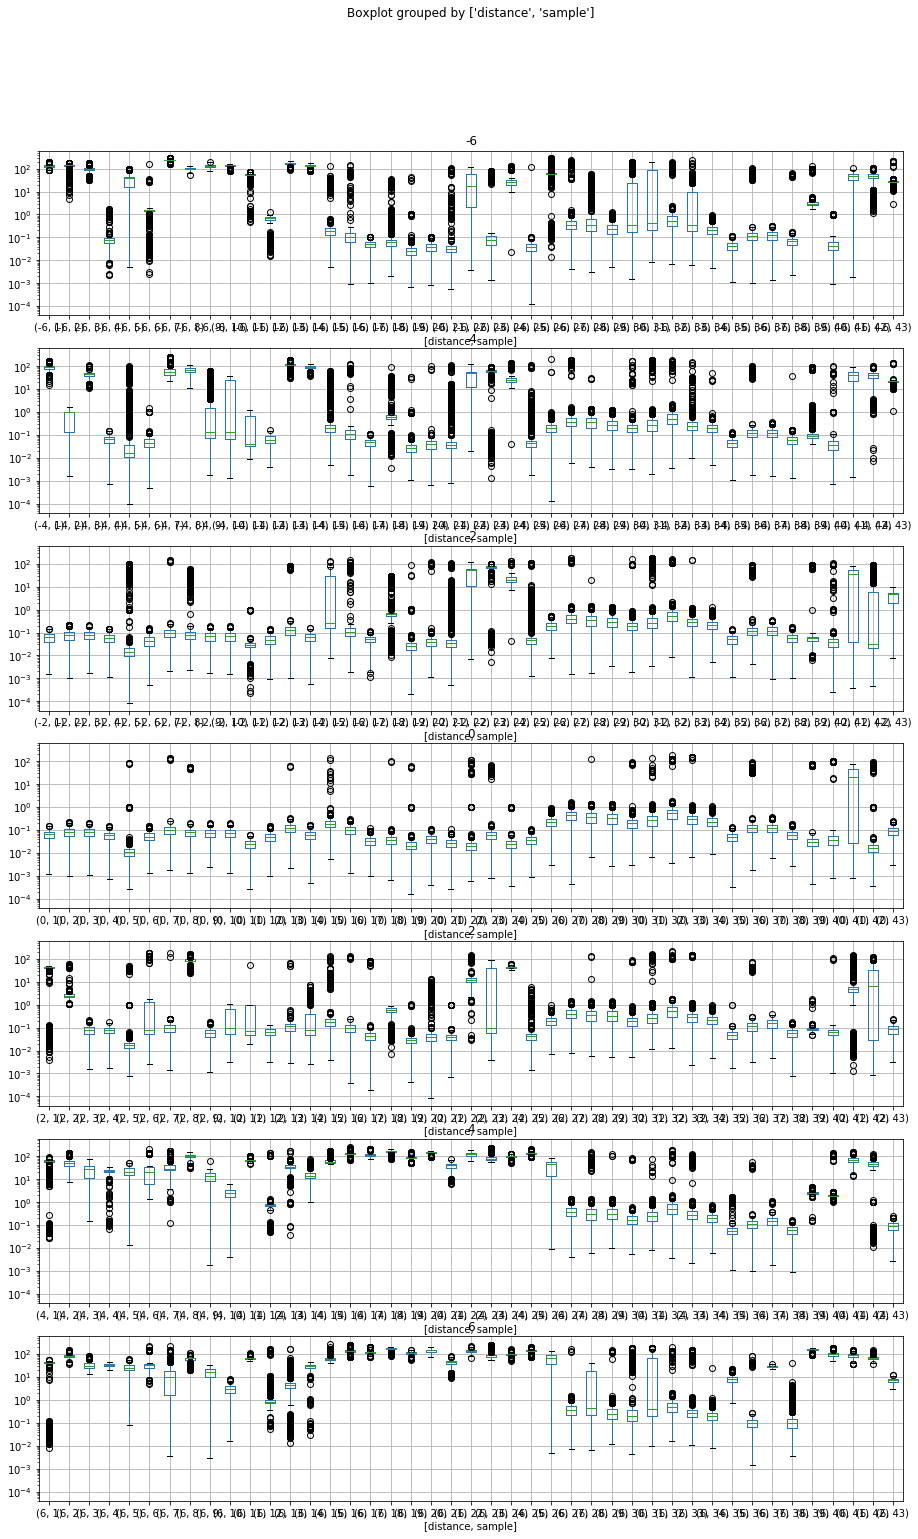

In [11]:
fig = plt.figure(figsize=(15,25))
ax = plt.subplot(1,1,1)
df.groupby("distance").boxplot(column="shift_err", by=["distance", "sample"], layout=(7,1), ax=ax)
plt.yscale("log")

In [12]:
df["rot_err"] = 34 * np.sqrt(
    np.power(df["rotation"]-df["rot_est"], 2)
)
df["scale_err"] = 400 * np.sqrt(
    np.power(df["x_scale"]-df["x_sc_est"], 2) + np.power(df["y_scale"]-df["y_sc_est"], 2)
)

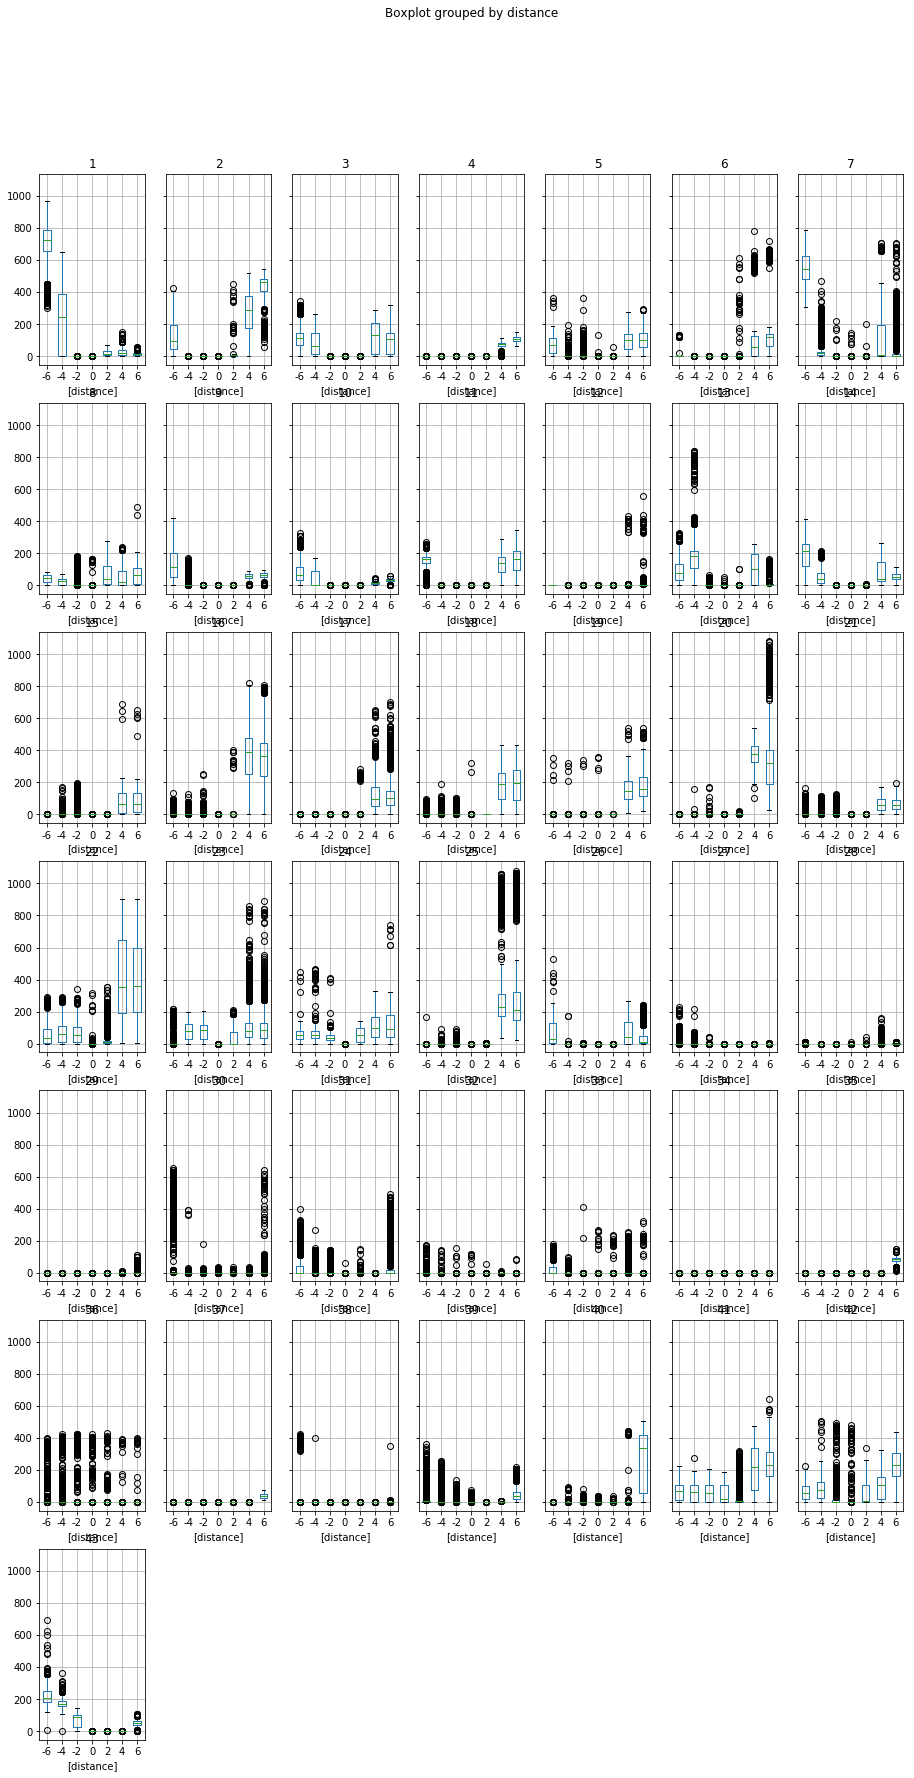

In [13]:
fig = plt.figure(figsize=(15,29))
ax = plt.subplot(1,1,1)
df.groupby("sample").boxplot(column="rot_err", by=["distance"], layout=(7,7), ax=ax)
plt.yscale("log")

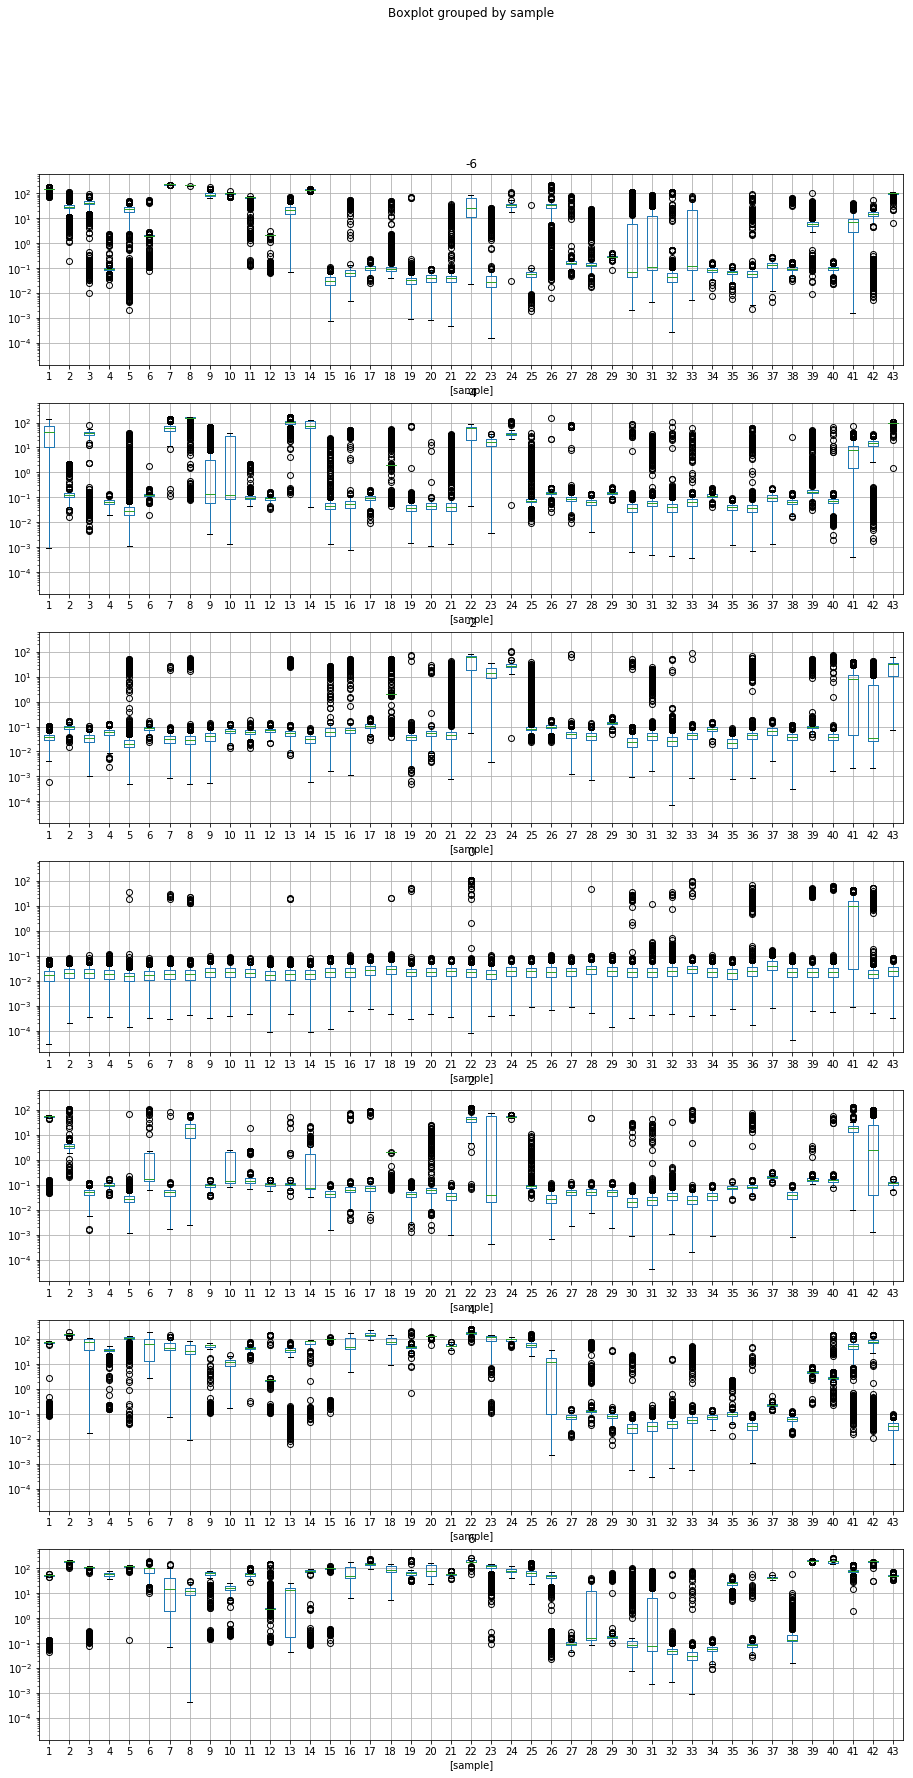

In [14]:
fig = plt.figure(figsize=(15,29))
ax = plt.subplot(1,1,1)
df.groupby("distance").boxplot(column="scale_err", by=["sample"], layout=(7,1), ax=ax)
plt.yscale("log")

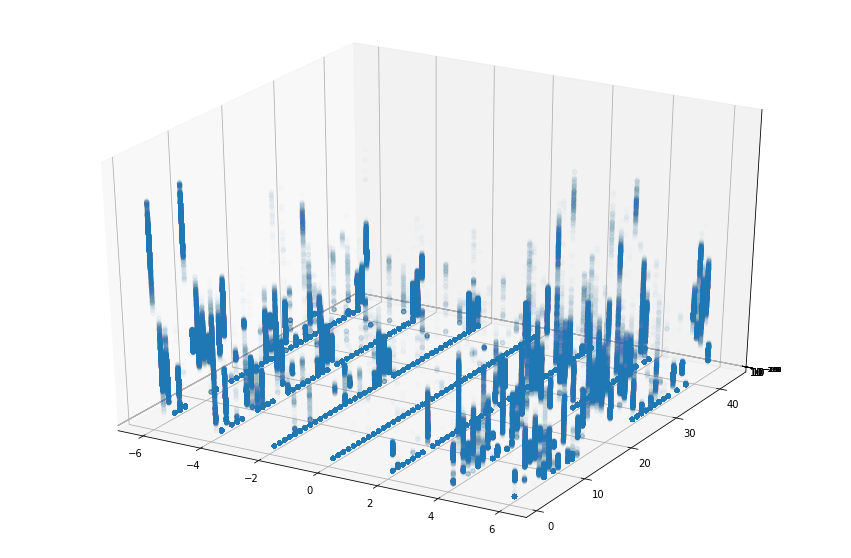

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["distance"], df["sample"], df["shift_err"] + df["rot_err"] + df["scale_err"], alpha=0.01)
ax.set_zscale("log")

In [16]:
df["err"] = df["shift_err"] + df["rot_err"] + df["scale_err"]

In [17]:
err_per_sample_distance = df.groupby(["sample", "distance"])["err"].agg(["mean"])
print(err_per_sample_distance.sort_values(by="mean").tail(20))

                        mean
sample distance             
13     -4         388.236615
41      6         405.418201
39      6         419.176755
18      4         429.045580
        6         449.973489
14     -6         464.917879
2       4         486.541015
42      6         487.819664
25      4         526.679474
40      6         551.108043
16      6         555.079967
25      6         559.456782
20      6         566.837627
16      4         570.110833
20      4         660.831953
22      4         715.349382
2       6         716.846716
22      6         722.117878
1      -6         993.502583
7      -6        1016.739035


In [18]:
correct = df[df["err"]<0.1][df["rot_err"]<0.1][df["scale_err"]<0.1].groupby(["sample", "distance"])["err"].agg(["count"]).unstack(fill_value=0).stack()
processed = df.groupby([ "sample", "distance"])["err"].agg(["count"])
to_show = correct.div(processed)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


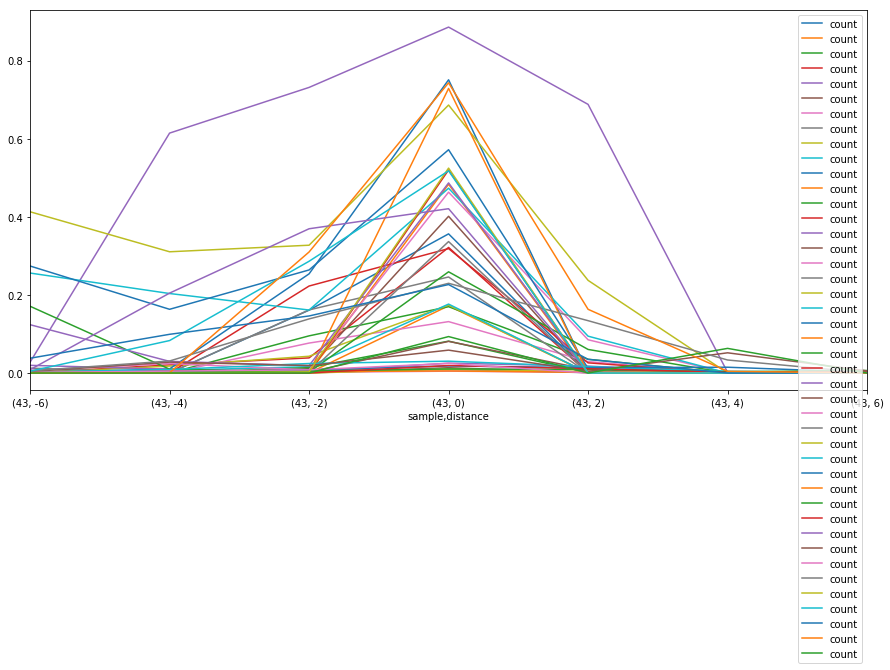

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
correct.div(processed).groupby(["sample"]).plot(by="sample", ax=ax)
plt.show()

In [20]:
correct.unstack().div(processed.unstack()).sort_index(level=3)

count                                                            
distance        -6        -4        -2         0         2         4         6
sample                                                                        
1         0.000000  0.000000  0.160996  0.356257  0.000755  0.000000  0.000000
2         0.000000  0.000000  0.000247  0.172116  0.000000  0.000000  0.000000
3         0.000000  0.000000  0.095168  0.169822  0.035203  0.000000  0.000000
4         0.000397  0.020921  0.038718  0.321496  0.000000  0.000000  0.000000
5         0.027794  0.614229  0.731196  0.885629  0.687770  0.001772  0.000000
6         0.000000  0.000000  0.011097  0.401251  0.000000  0.000000  0.000000
7         0.000000  0.000000  0.076695  0.131608  0.029165  0.000000  0.000000
8         0.000000  0.000000  0.161569  0.245902  0.000000  0.000000  0.000000
9         0.000000  0.017734  0.042931  0.173828  0.000000  0.000000  0.000000
10        0.000000  0.006650  0.016284  0.176471  0.000000  0.000000  0.000000
11        0.000000  0.010591  0.253886  0.750701  0.000000  0.000000  0.000000
12        0.000000  0.000000  0.000247  0.483272  0.000000  0.000000  0.000000
13        0.000000  0.000000  0.013820  0.081621  0.000824  0.000000  0.000000
14        0.000000  0.000000  0.222716  0.318589  0.026022  0.000000  0.000000
15        0.019666  0.009855  0.002965  0.025240  0.017783  0.000000  0.000000
16        0.000737  0.006898  0.002473  0.081000  0.008725  0.000000  0.000000
17        0.006883  0.024144  0.008164  0.463047  0.085133  0.000000  0.000000
18        0.012537  0.000246  0.000744  0.336559  0.000000  0.000000  0.000000
19        0.412835  0.310421  0.327214  0.686078  0.237225  0.000000  0.000000
20        0.255963  0.203549  0.161274  0.473092  0.094347  0.000000  0.000000
21        0.273979  0.163135  0.263879  0.571690  0.012063  0.000000  0.000000
22        0.001476  0.000246  0.000249  0.728531  0.000000  0.000000  0.000000
23        0.170930  0.009857  0.001743  0.259142  0.060366  0.000000  0.000000
24        0.000246  0.000000  0.000249  0.519899  0.000000  0.000000  0.000000
25        0.123709  0.029818  0.018976  0.486726  0.003342  0.000000  0.000000
26        0.000000  0.000000  0.000000  0.013608  0.001254  0.000450  0.000000
27        0.000000  0.000000  0.001754  0.004760  0.001673  0.000000  0.000000
28        0.000000  0.001232  0.005272  0.009554  0.000837  0.000000  0.000000
29        0.000000  0.000000  0.000000  0.009960  0.003770  0.000450  0.000000
30        0.002705  0.008874  0.024390  0.030323  0.016373  0.004498  0.001381
31        0.000738  0.002711  0.008075  0.018036  0.013866  0.014845  0.001842
32        0.001722  0.001232  0.003540  0.005360  0.001681  0.001350  0.001382
33        0.000000  0.001725  0.005059  0.010424  0.009267  0.003149  0.006458
34        0.000984  0.000000  0.000253  0.019263  0.010975  0.001799  0.002768
35        0.008610  0.204585  0.369344  0.420678  0.002115  0.000000  0.000000
36        0.003690  0.027860  0.019084  0.058603  0.004243  0.051755  0.005538
37        0.001476  0.004931  0.008155  0.024561  0.000000  0.000000  0.000000
38        0.005412  0.030819  0.138548  0.229711  0.134016  0.033348  0.000462
39        0.000000  0.000000  0.002823  0.524608  0.000000  0.000000  0.000000
40        0.004675  0.083087  0.286118  0.517702  0.000000  0.000000  0.000000
41        0.037903  0.099112  0.146091  0.226525  0.034974  0.000000  0.000000
42        0.000000  0.000740  0.309892  0.742973  0.163133  0.004507  0.000000
43        0.000000  0.000000  0.000000  0.093318  0.000000  0.063091  0.000000

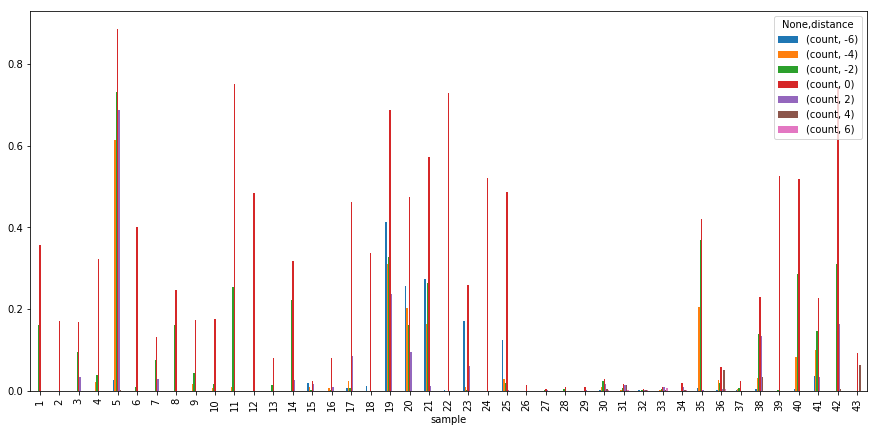

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
to_show.unstack().plot.bar(ax=ax)
plt.show()

In [22]:
from scipy.io import loadmat
for s in range(1,43):
    x = loadmat('data/raw/sample.mat')

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/sample.mat'

In [ ]:
ls "data/raw"

In [23]:
# clustering podle realného displacementu
df["lt_displacement"] = df["shift_err"]
x_real = df["x_scale"] * np.cos(df["rotation"]/180*np.pi) * 400 - np.sin(df["rotation"]/180*np.pi) * 400 + df["x_shift"]
#x_est	y_est	rot_est	x_sc_est	y_sc_est
#x_est = df["x_sc_est"] * np.cos["rot_est"] * 400 - np.sin["rot_est"] * 400 + df["x_est"]
y_real = df["y_scale"] * np.cos(df["rotation"]/180*np.pi) * 400 + np.sin(df["rotation"]/180*np.pi) * 400 + df["y_shift"]
#y_est = df["y_sc_est"] * np.cos["rot_est"] * 400 + np.sin["rot_est"] * 400 + df["y_est"]
df["rb_displacement"] = np.sqrt(np.power(400-x_real, 2) + np.power(400-y_real, 2))

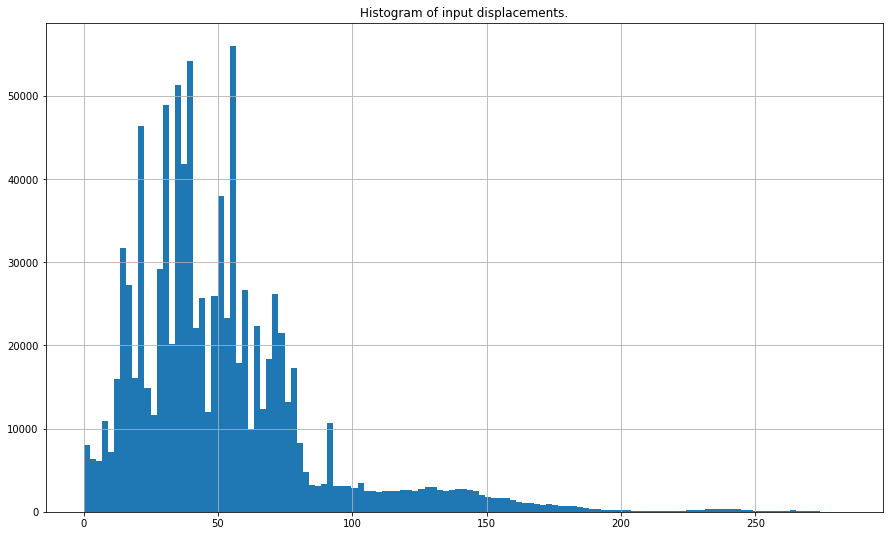

In [24]:
fig, ax = plt.subplots(figsize=(15,9))
df[["rb_displacement", "lt_displacement"]].max(axis=1).hist(ax=ax, bins=125)
plt.title("Histogram of input displacements.")
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


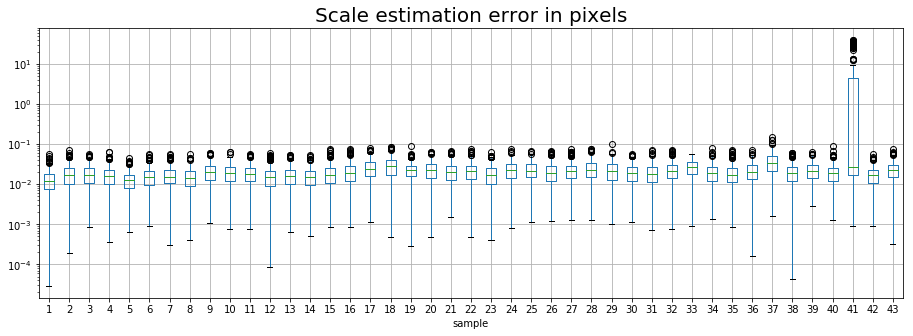

In [48]:
fig, ax = plt.subplots(figsize=(15,5))
df[df[["rb_displacement", "lt_displacement"]].max(axis=1) < 20][df["distance"]==0].boxplot(by="sample", column="scale_err", ax=ax)
plt.suptitle("")
plt.title("""Scale estimation error in pixels""", fontsize=20)
plt.yscale("log")
plt.savefig("reports/figures/scale_err_40.pdf")
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


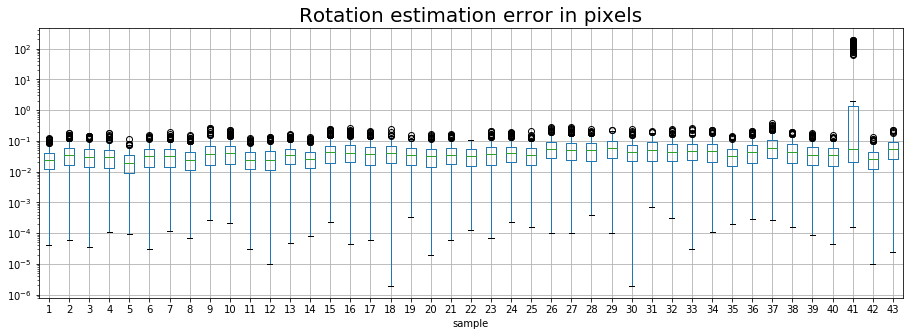

In [49]:
fig, ax = plt.subplots(figsize=(15,5))
df[df[["rb_displacement", "lt_displacement"]].max(axis=1) < 20][df["distance"]==0].boxplot(by="sample", column="rot_err", ax=ax)
plt.suptitle("")
plt.title("""Rotation estimation error in pixels""", fontsize=20)
plt.yscale("log")
plt.savefig("reports/figures/rotation_err_40.pdf")
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


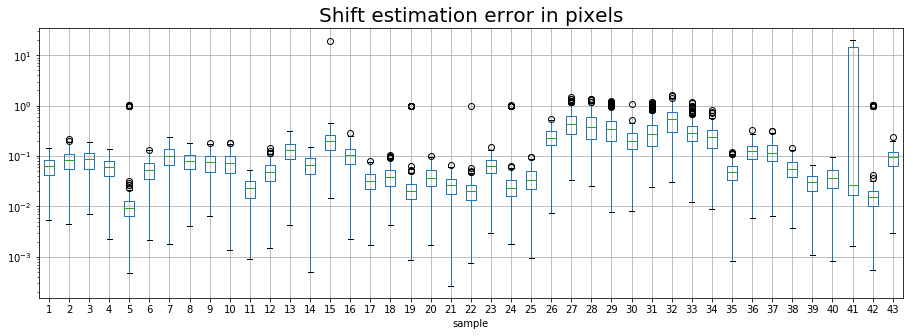

In [50]:
fig, ax = plt.subplots(figsize=(15,5))
df[df[["rb_displacement", "lt_displacement"]].max(axis=1) < 20][df["distance"]==0].boxplot(by="sample", column="shift_err", ax=ax)
plt.suptitle("")
plt.title("""Shift estimation error in pixels""", fontsize=20)
plt.yscale("log")
plt.savefig("reports/figures/shift_err_40.pdf")
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


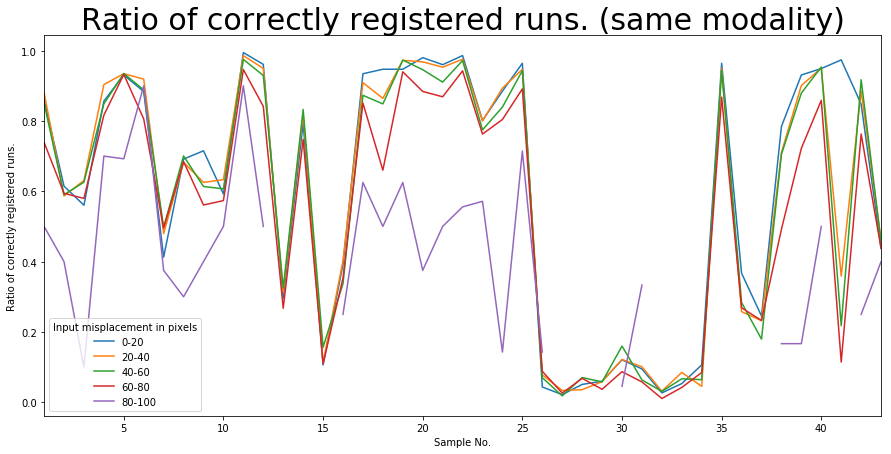

In [26]:
df["OK"] = (df["shift_err"] < 0.1) & (df["rot_err"] < 0.1) & (df["scale_err"] < 0.1)
fig, ax = plt.subplots(figsize=(15,7))
for rg in range(0, 100, 20):
    dtt = df[df[["rb_displacement", "lt_displacement"]].max(axis=1) > rg]\
            [df[["rb_displacement", "lt_displacement"]].max(axis=1) < rg + 10]\
            [df["distance"]==0]
    dtt[dtt["OK"]].groupby("sample")["OK"].agg("count").div(dtt.groupby("sample")["OK"].agg("count")).plot.line(label=f"{rg}-{rg+20}", ax=ax)
plt.legend(title="Input misplacement in pixels")
plt.title("Ratio of correctly registered runs. (same modality)", fontsize=30)
plt.xlabel("Sample No.")
plt.ylabel("Ratio of correctly registered runs.")
plt.show()
    


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


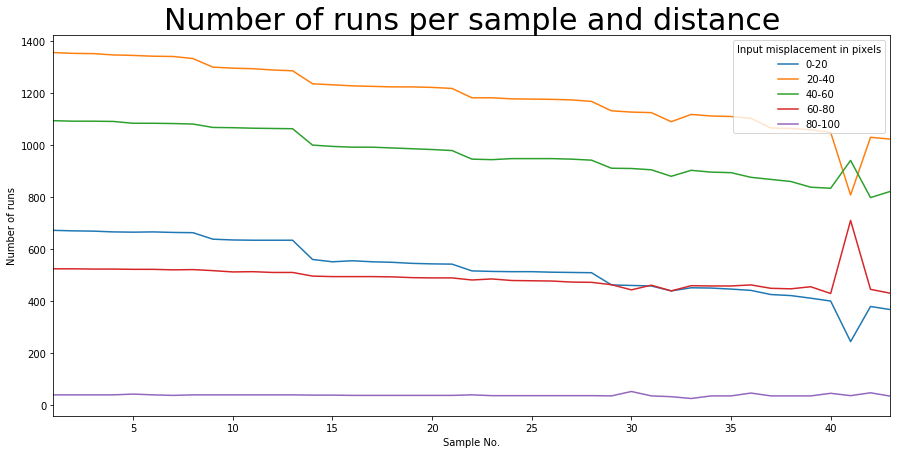

In [27]:
df["OK"] = (df["shift_err"] < 0.1) & (df["rot_err"] < 0.1) & (df["scale_err"] < 0.1)
fig, ax = plt.subplots(figsize=(15,7))
step = 20
for rg in range(0, 100, step):
    dtt = df[df[["rb_displacement", "lt_displacement"]].max(axis=1) > rg]\
            [df[["rb_displacement", "lt_displacement"]].max(axis=1) < rg + step]\
            [df["distance"]==0]
    dtt.groupby("sample")["OK"].agg("count").plot.line(label=f"{rg}-{rg+step}", ax=ax)
plt.legend(title="Input misplacement in pixels")
plt.title("Number of runs per sample and distance", fontsize=30)
plt.xlabel("Sample No.")
plt.ylabel("Number of runs")
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


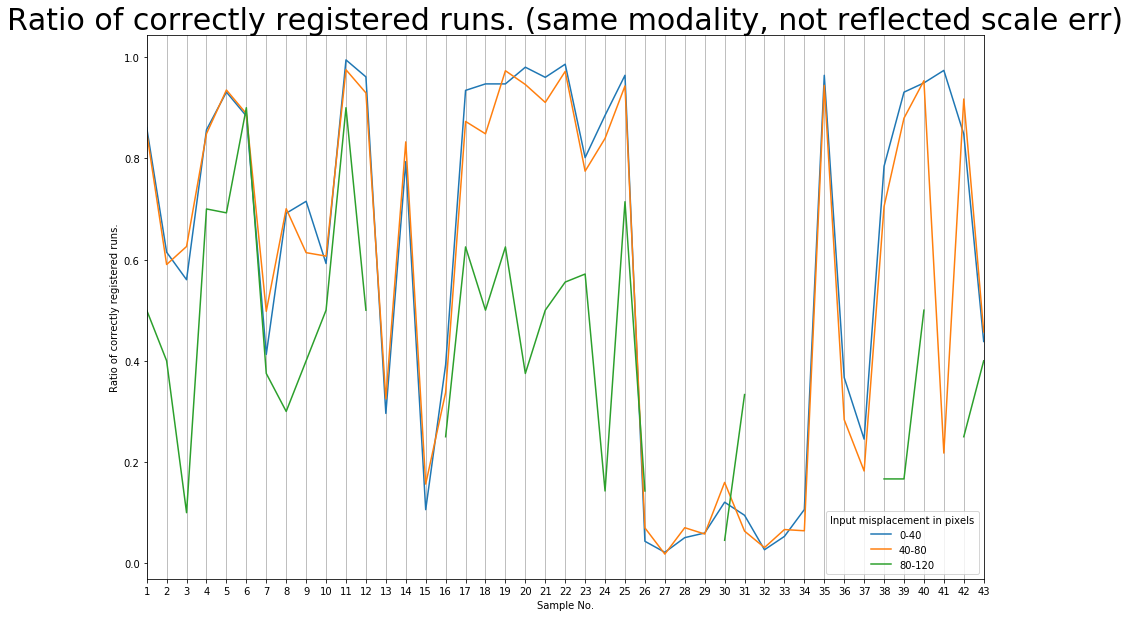

In [28]:
df["OK"] = (df["shift_err"] < 0.1) & (df["rot_err"] < 0.1)
fig, ax = plt.subplots(figsize=(15,10))
for rg in range(0, 120, 40):
    dtt = df[df[["rb_displacement", "lt_displacement"]].max(axis=1) > rg]\
            [df[["rb_displacement", "lt_displacement"]].max(axis=1) < rg + 10]\
            [df["distance"]==0]
    dtt[dtt["OK"]].groupby("sample")["OK"].agg("count").div(dtt.groupby("sample")["OK"].agg("count")).plot.line(label=f"{rg}-{rg+40}", ax=ax)
plt.legend(title="Input misplacement in pixels")
plt.title("Ratio of correctly registered runs. (same modality, not reflected scale err)", fontsize=30)
plt.xlabel("Sample No.")
plt.ylabel("Ratio of correctly registered runs.")
plt.xticks(range(1,44))
ax.xaxis.grid(which="both")
plt.show()
    



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


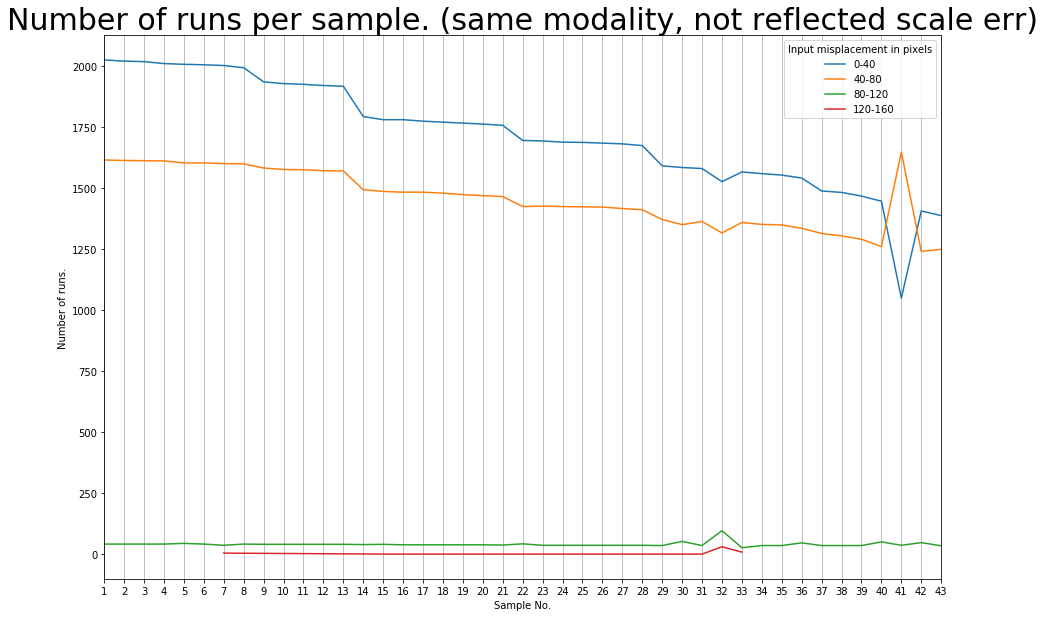

In [29]:
df["OK"] = (df["shift_err"] < 0.1) & (df["rot_err"] < 0.1)
fig, ax = plt.subplots(figsize=(15,10))
for rg in range(0, 160, 40):
    dtt = df[df[["rb_displacement", "lt_displacement"]].max(axis=1) > rg]\
            [df[["rb_displacement", "lt_displacement"]].max(axis=1) < rg + 40]\
            [df["distance"]==0]
    dtt.groupby("sample")["OK"].agg("count").plot.line(label=f"{rg}-{rg+40}", ax=ax)
plt.legend(title="Input misplacement in pixels")
plt.title("Number of runs per sample. (same modality, not reflected scale err)", fontsize=30)
plt.xlabel("Sample No.")
plt.ylabel("Number of runs.")
plt.xticks(range(1,44))
ax.xaxis.grid(which="both")
plt.show()